In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins.csv")

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,41.5,20.0,186,3450,NaN
4,Adelie,Torgersen,36.7,19.3,193,3450,female


In [5]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Create new columns for encoded values
df['Species_n'] = LE.fit_transform(df['species'])

In [6]:
df.drop(axis=1,columns='species',inplace=True)

In [8]:
df_encoded = pd.get_dummies(df, columns=["island", "Gender"], prefix=["island", "Genderx"])

In [9]:
X = df_encoded.drop('Species_n', axis=1)
y =df_encoded['Species_n']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

In [11]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
y_pred = svclassifier.predict(X_test)

In [13]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[33  1  0]
 [ 0 11  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



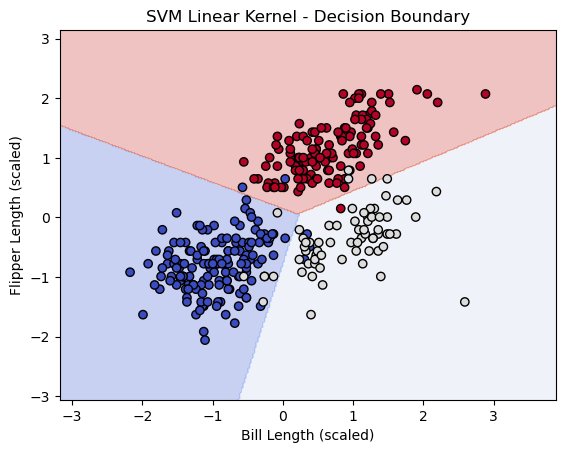

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Select 2 features for plotting (example: bill_length_mm and flipper_length_mm)
X_plot = df_encoded[["bill_length_mm", "flipper_length_mm"]].values
y_plot = df_encoded["Species_n"].values

# Scale features (important for SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_plot)

# Train SVM again with only 2 features
clf = SVC(kernel="linear")
clf.fit(X_scaled, y_plot)

# Create meshgrid for background decision regions
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries + data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("Bill Length (scaled)")
plt.ylabel("Flipper Length (scaled)")
plt.title("SVM Linear Kernel - Decision Boundary")
plt.show()


In [16]:
df_label=df

In [29]:
df_label['Island_n']  = LE.fit_transform(df_label['island'])
df_label['Gender_n'] = LE.fit_transform(df_label['Gender'])

KeyError: 'island'

In [32]:
df_label.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Species_n,Island_n,Gender_n
0,39.1,18.7,181,3750,0,2,1
1,39.5,17.4,186,3800,0,2,0
2,40.3,18.0,195,3250,0,2,0
3,41.5,20.0,186,3450,0,2,2
4,36.7,19.3,193,3450,0,2,0


In [33]:
#df_label.drop(axis=1,columns='island',inplace=True)
df_label.drop(axis=1,columns='Gender',inplace=True)

KeyError: "['Gender'] not found in axis"

In [34]:
X =df_label.drop('Species_n', axis=1)
y =df_label['Species_n']

In [35]:
df_label.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Species_n,Island_n,Gender_n
0,39.1,18.7,181,3750,0,2,1
1,39.5,17.4,186,3800,0,2,0
2,40.3,18.0,195,3250,0,2,0
3,41.5,20.0,186,3450,0,2,2
4,36.7,19.3,193,3450,0,2,0


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=1)

In [37]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
y_pred = svclassifier.predict(X_test)

In [39]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[33  1  0]
 [ 0 15  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        20

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



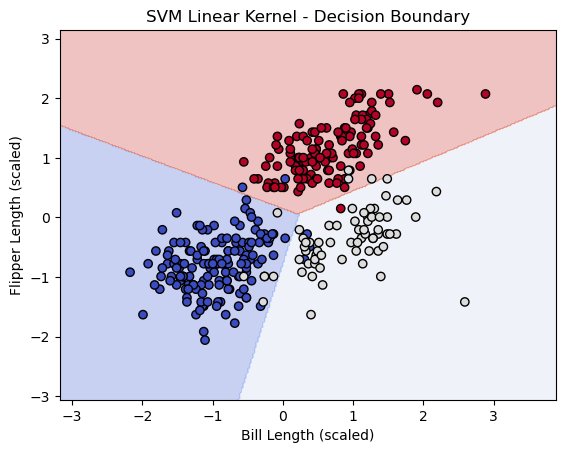

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Select 2 features for plotting (example: bill_length_mm and flipper_length_mm)
X_plot = df_label[["bill_length_mm", "flipper_length_mm"]].values
y_plot = df_label["Species_n"].values

# Scale features (important for SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_plot)

# Train SVM again with only 2 features
clf = SVC(kernel="linear")
clf.fit(X_scaled, y_plot)

# Create meshgrid for background decision regions
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries + data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("Bill Length (scaled)")
plt.ylabel("Flipper Length (scaled)")
plt.title("SVM Linear Kernel - Decision Boundary")
plt.show()
